In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.io 
from scipy.fftpack import fft
import scipy.signal as signal

In [8]:
def get_channel_data(path):
    data = scipy.io.loadmat(path)
    input_signal = data["IMS"]
    ch1 = tuple(input_signal[0,:])
    ch2 = tuple(input_signal[1,:])
    ch3 = tuple(input_signal[2,:])
    ch4 = tuple(input_signal[3,:])
    return ch1,ch2,ch3,ch4

data = scipy.io.loadmat('C:/Users/marco/Desktop/IMS6200.mat')
input_signal = data["IMS"]
ch1 = np.array(input_signal[0,:])
ch2 = np.array(input_signal[1,:])
ch3 = np.array(input_signal[2,:])
ch4 = np.array(input_signal[3,:])

In [13]:
def _filter(ch1, ch2, ch3, ch4, order = 10, wn = 0.5):
    b,a = tuple(signal.butter(order, wn,'lowpass'))
    fil_ch1 = tuple(signal.filtfilt(b,a,ch1))
    fil_ch2 = tuple(signal.filtfilt(b,a,ch2))
    fil_ch3 = tuple(signal.filtfilt(b,a,ch3))
    fil_ch4 = tuple(signal.filtfilt(b,a,ch4))
    return fil_ch1,fil_ch2,fil_ch3,fil_ch4


In [14]:
def fourier_tranform(ch1,ch2,ch3,ch4):
    ft_ch1 = fft(ch1)
    ft_ch2 = fft(ch2)
    ft_ch3 = fft(ch3)
    ft_ch4 = fft(ch4)
    return ft_ch1,ft_ch2,ft_ch3,ft_ch4

In [15]:
def plot_fft(ch1,ch2,ch3,ch4,Fs):
    T = 1/Fs
    L = len(ch1)
    xf = np.linspace(0.0, 1.0/(2.0*T), L//2)

    plt.figure(dpi = 1000)
    f_1 = plt.plot(xf, 2.0/L*np.abs(ch1[0:L//2]))
    f_2 = plt.plot(xf, 2.0/L*np.abs(ch2[0:L//2]))
    f_3 = plt.plot(xf, 2.0/L*np.abs(ch3[0:L//2]))
    f_4 = plt.plot(xf, 2.0/L*np.abs(ch4[0:L//2]))
    legend = plt.legend(["ch1","ch2","ch3","ch4"])
    plt.title("IMS Bearing Data (Fourier Transform)")
    plt.xlabel('Frequency(Hz)')
    plt.ylabel('Gravity(m/s^2)')
    plt.grid()
    plt.show()

Fs = 20000
T = 1/Fs
L = len(ch1)
t = np.linspace(0,L,L)*T
xf = np.linspace(0.0, 1.0/(2.0*T), L//2)

plt.figure(dpi = 1000)/n
f_1 = plt.plot(xf, 2.0/L*np.abs(f_ch1[0:L//2]))
f_2 = plt.plot(xf, 2.0/L*np.abs(f_ch2[0:L//2]))
f_3 = plt.plot(xf, 2.0/L*np.abs(f_ch3[0:L//2]))
f_4 = plt.plot(xf, 2.0/L*np.abs(f_ch4[0:L//2]))
legend = plt.legend(["ch1","ch2","ch3","ch4"])
plt.title("IMS Bearing Data (Fourier Transform)")
plt.xlabel('Frequency(Hz)')
plt.ylabel('Gravity(m/s^2)')
plt.grid()
plt.show()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


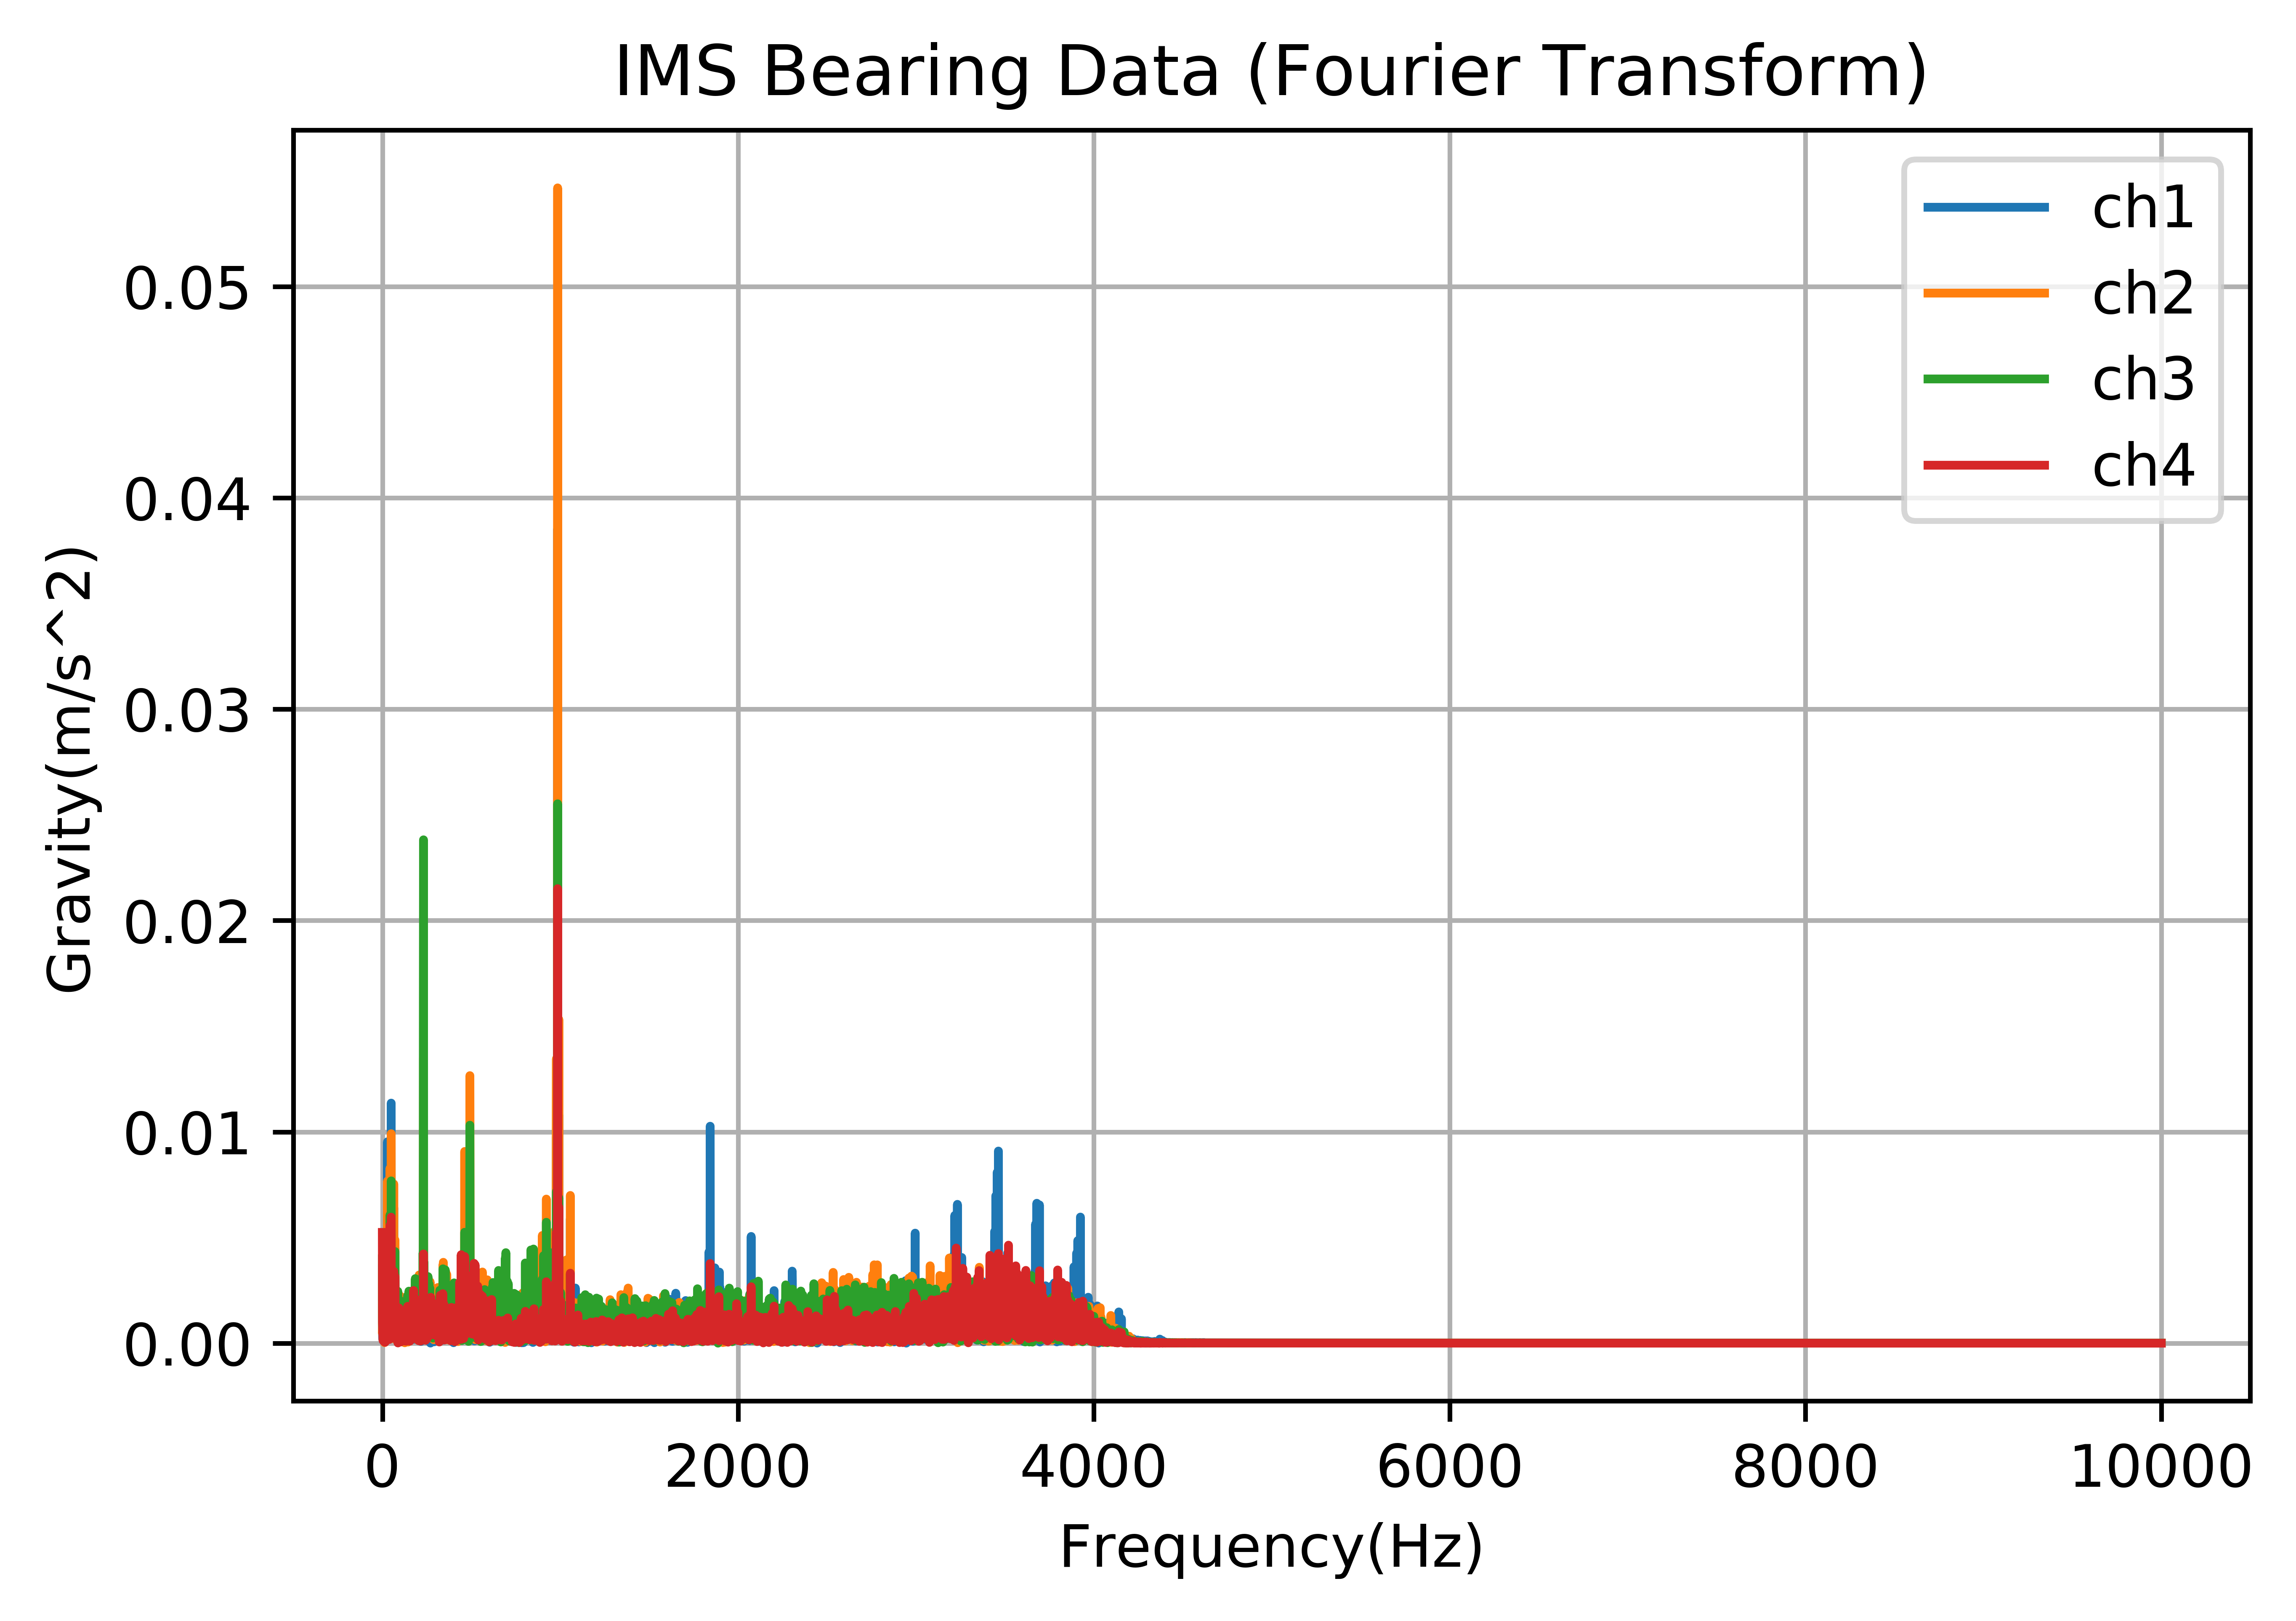

In [18]:
ch1,ch2,ch3,ch4 = get_channel_data('C:/Users/marco/Desktop/IMS6200.mat')
fil_ch1,fil_ch2,fil_ch3,fil_ch4 = _filter(ch1, ch2, ch3, ch4, order=20, wn = 0.4)
ft_ch1,ft_ch2,ft_ch3,ft_ch4 = fourier_tranform(fil_ch1, fil_ch2, fil_ch3, fil_ch4)
plot_fft(ft_ch1, ft_ch2, ft_ch3, ft_ch4, Fs = 20000)